In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import scipy.constants as const
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")  # silence LAL warnings
from pyseobnr.generate_waveform import GenerateWaveform, generate_modes_opt
# from pycbc.waveform import get_td_waveform

In [24]:
# Start with the usual parameter definitions
# Masses in solar masses
m1 = 40
m2 = 20
s1x, s1y, s1z = 0.0, 0.0, 0.0
s2x, s2y, s2z = 0.0, 0.0, 0.0

deltaT = 1.0 / 2048.0
f_min = 10

distance = 1000.0  # Mpc
inclination = np.pi / 3.0
phiRef = 0.0
approximant = "SEOBNRv5EHM"

params_dict = {
    "mass1": m1,
    "mass2": m2,
    "spin1x": s1x,
    "spin1y": s1y,
    "spin1z": s1z,
    "spin2x": s2x,
    "spin2y": s2y,
    "spin2z": s2z,
    "deltaT": deltaT,
    "f22_start": f_min,
    "phi_ref": phiRef,
    "distance": distance,
    "inclination": inclination,
    "approximant": approximant,
    "eccentricity": 0.4
}

In [25]:
# We call the generator with the parameters
wfm_gen = GenerateWaveform(params_dict)

# Generate mode dictionary
times, hlm = wfm_gen.generate_td_modes()

/home/ben.patterson/.conda/envs/igwn_eccentric_new/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ben.patterson/.conda/envs/igwn_eccentric_new/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-1.0, 0.1)

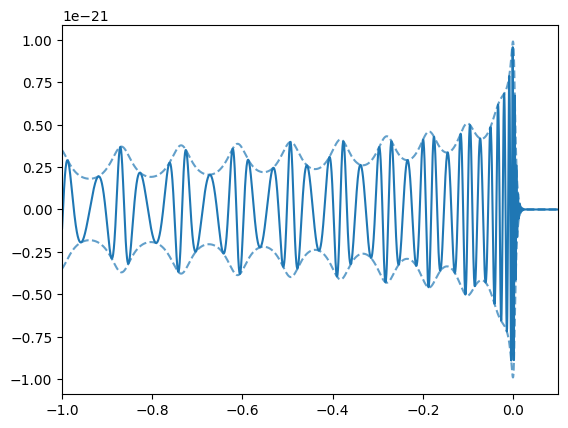

In [26]:
plt.plot(times, hlm[(2,2)], c='C0')
plt.plot(times, np.abs(hlm[(2,2)]), c='C0', alpha=0.7, ls='dashed')
plt.plot(times, -np.abs(hlm[(2,2)]), c='C0', alpha=0.7, ls='dashed')
plt.xlim(-1,0.1)

# Test speed

In [38]:
import time
from simple_pe.waveforms import make_waveform
import logging
_logger = logging.getLogger('PESummary')
_logger.setLevel(logging.CRITICAL + 10)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [81]:
start = time.time()
for i in range(20):
    # Start with the usual parameter definitions
    # Masses in solar masses
    m1 = 40
    m2 = 20
    s1x, s1y, s1z = 0.0, 0.0, 0.0
    s2x, s2y, s2z = 0.0, 0.0, 0.0
    
    deltaT = 1.0 / 2048.0
    f_min = 10
    
    distance = 1000.0  # Mpc
    inclination = np.pi / 3.0
    phiRef = 0.0
    approximant = "SEOBNRv5EHM"
    
    params_dict = {
        "mass1": m1,
        "mass2": m2,
        "spin1x": s1x,
        "spin1y": s1y,
        "spin1z": s1z,
        "spin2x": s2x,
        "spin2y": s2y,
        "spin2z": s2z,
        "deltaT": deltaT,
        "f22_start": f_min,
        "phi_ref": phiRef,
        "distance": distance,
        "inclination": inclination,
        "approximant": approximant,
        "eccentricity": 0.4
    }

    # We call the generator with the parameters
    wfm_gen = GenerateWaveform(params_dict)
    
    # Generate mode dictionary
    times, hlm = wfm_gen.generate_td_modes()

end = time.time()
print(f'{end-start:.2f} seconds')

8.57 seconds


In [82]:
start = time.time()
params = {'mass_1': 40, 'mass_2': 20, 'spin_1x': 0, 'spin_1y': 0, 'spin_1z': 0, 'spin_2x': 0, 'spin_2y': 0, 'spin_2z': 0,
          'phase': 0, 'distance': 1000, 'inclination': 0, 'ecc10': 0.4}
tlen = 32
sample_rate = 2048
df = 1/tlen
flen = (tlen*sample_rate)//2 + 1
f_low = 10
for i in range(20):
    hp, hc = make_waveform(params, df, f_low, flen, approximant='TEOBResumS-Dali', return_hc=True)

end = time.time()
print(f'{end-start:.2f} seconds')

9.87 seconds


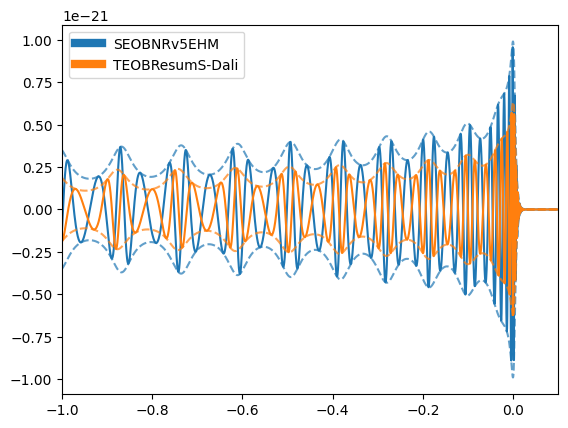

In [79]:
plt.plot(times, hlm[(2,2)], c='C0', label='SEOBNRv5EHM')
plt.plot(times, np.abs(hlm[(2,2)]), ls='dashed', alpha=0.7, c='C0')
plt.plot(times, -np.abs(hlm[(2,2)]), ls='dashed', alpha=0.7, c='C0')
hpt = hp.to_timeseries()
hct = hc.to_timeseries()
ht = hpt - 1j*hct
plt.plot(ht.sample_times, ht, c='C1', label='TEOBResumS-Dali')
plt.plot(ht.sample_times, np.abs(ht), ls='dashed', alpha=0.7, c='C1')
plt.plot(ht.sample_times, -np.abs(ht), ls='dashed', alpha=0.7, c='C1')
plt.xlim(-1,0.1)
plt.legend()
plt.show()

# Dynamics with 'expert' mode

In [87]:
t, r, phi, pr, pphi, e, z, x, H, Omega = wfm_gen.model.dynamics.T

In [126]:
# How to convert from dimensionless x to frequency - 60 here is the total mass
x[0]**(3/2)*const.c**3/(const.G*60*aconst.M_sun.value*np.pi)

9.996685760237794

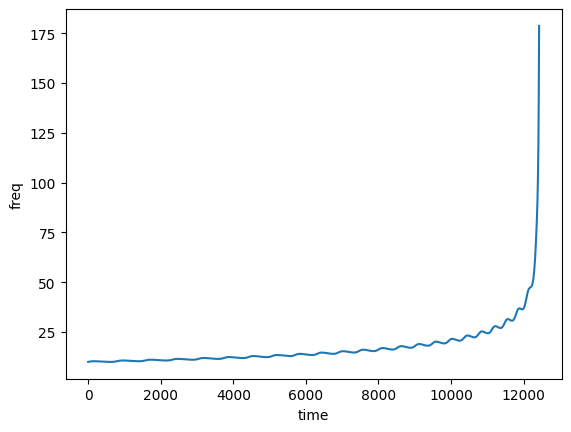

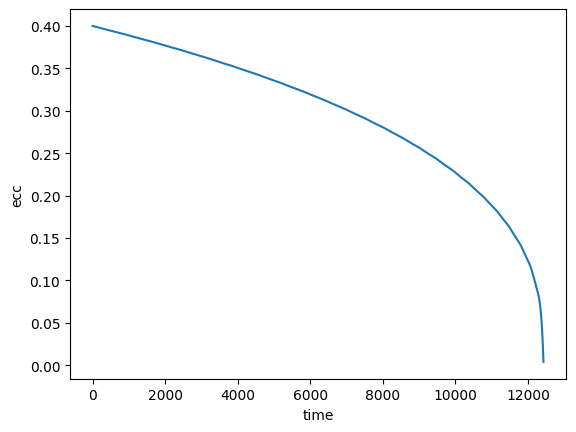

In [127]:
plt.plot(t, x**(3/2)*const.c**3/(const.G*60*aconst.M_sun.value*np.pi))
plt.xlabel('time')
plt.ylabel('freq')
plt.show()

plt.plot(t, e)
plt.xlabel('time')
plt.ylabel('ecc')
plt.show()

# Rel anomaly parameter

In [132]:
hlms = []
timess = []
n = 6
for i in range(n):
    # Start with the usual parameter definitions
    # Masses in solar masses
    m1 = 40
    m2 = 20
    s1x, s1y, s1z = 0.0, 0.0, 0.0
    s2x, s2y, s2z = 0.0, 0.0, 0.0
    
    deltaT = 1.0 / 2048.0
    f_min = 10
    
    distance = 1000.0  # Mpc
    inclination = np.pi / 3.0
    phiRef = 0.0
    approximant = "SEOBNRv5EHM"
    rel_anomaly = 2*np.pi*i/n
    
    params_dict = {
        "mass1": m1,
        "mass2": m2,
        "spin1x": s1x,
        "spin1y": s1y,
        "spin1z": s1z,
        "spin2x": s2x,
        "spin2y": s2y,
        "spin2z": s2z,
        "deltaT": deltaT,
        "f22_start": f_min,
        "phi_ref": phiRef,
        "distance": distance,
        "inclination": inclination,
        "approximant": approximant,
        "eccentricity": 0.4,
        "rel_anomaly": rel_anomaly
    }

    # We call the generator with the parameters
    wfm_gen = GenerateWaveform(params_dict)
    
    # Generate mode dictionary
    times, hlm = wfm_gen.generate_td_modes()
    hlms.append(hlm)
    timess.append(times)

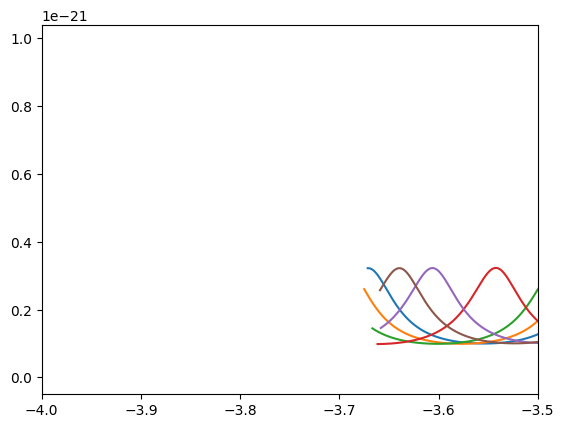

In [137]:
for i in range(n):
    plt.plot(timess[i], np.abs(hlms[i][(2,2)]))
plt.xlim(-4,-3.5)
plt.show()